<a href="https://colab.research.google.com/github/Sanskar567/Zomato-Data-Analysis/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
data = pd.read_csv("/content/Zomato-data-.csv")
print(data.head(10))

                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

    rate  votes  approx_cost(for two people) listed_in(type)  
0  4.1/5    775                          800          Buffet  
1  4.1/5    787

In [4]:
def correctRate(value):
  value = str(value).split('/')
  value = value[0];
  return float(value)

data['rate']=data['rate'].apply(correctRate)
print(data.head(10))


                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

   rate  votes  approx_cost(for two people) listed_in(type)  
0   4.1    775                          800          Buffet  
1   4.1    787   

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [6]:
print(data.isnull().sum())

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


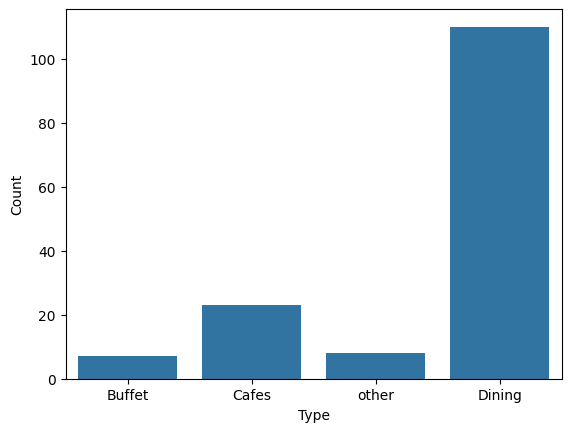

In [13]:
sb.countplot(x = data['listed_in(type)'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

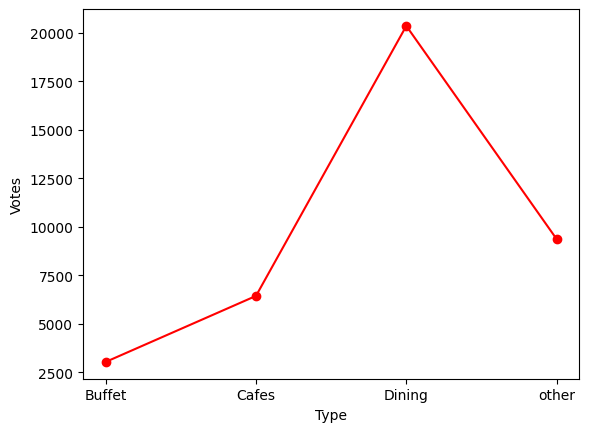

In [17]:
grouped_data = data.groupby('listed_in(type)')['votes'].sum()

plt.plot(grouped_data.index, grouped_data.values , c ='red', marker ='o')
plt.xlabel('Type')
plt.ylabel('Votes')
plt.show()

In [24]:
max_votes =data['votes'].max()
max_votes_resturant = data.loc[data['votes']== max_votes, 'name']

print('Resturant with maximum votes is :', max_votes)
print(max_votes_resturant)

Resturant with maximum votes is : 4884
38    Empire Restaurant
Name: name, dtype: object


/tmp/ipython-input-3491538117.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x = data['online_order'], palette=custom_palette)


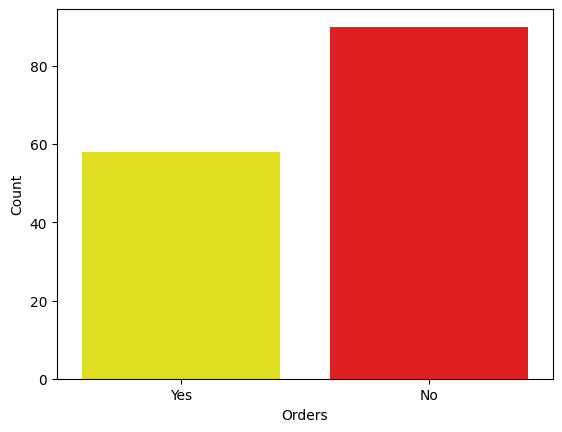

In [30]:
# Define a custom palette: 'Yes' in default blue, 'No' in red
custom_palette = {'Yes': 'yellow', 'No': 'red'}

sb.countplot(x = data['online_order'], palette=custom_palette)
plt.xlabel('Orders')
plt.ylabel('Count')
plt.show()

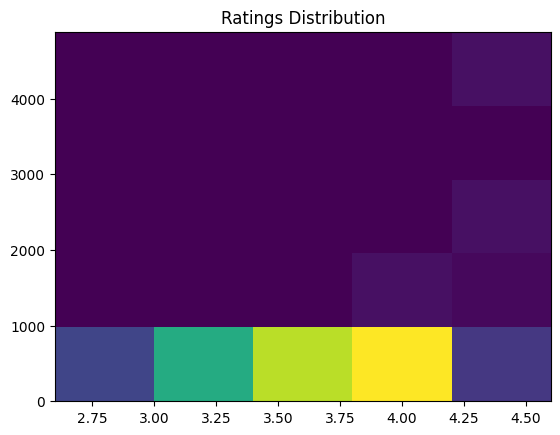

In [33]:
plt.hist2d(data['rate'],data['votes'], bins =5)
plt.title('Ratings Distribution')
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

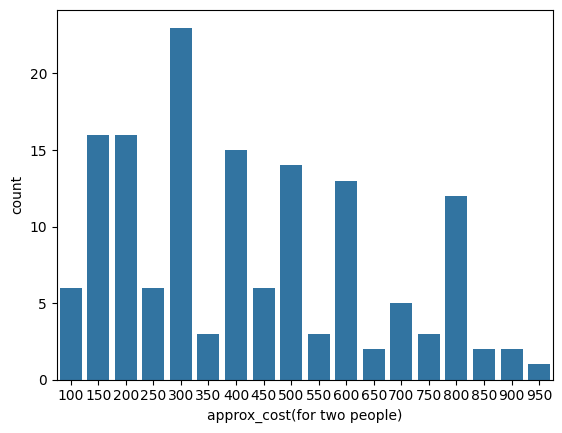

In [36]:
couple_data =data['approx_cost(for two people)']
sb.countplot(x=couple_data)

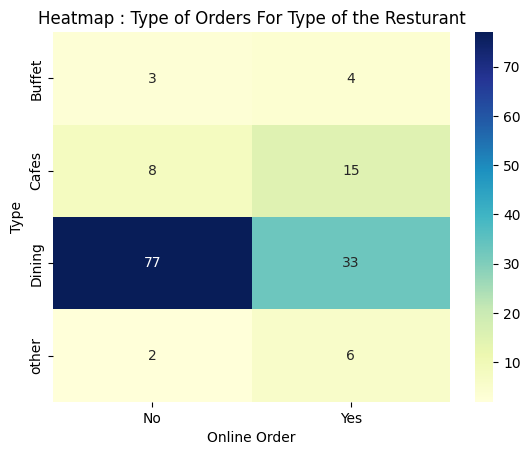

In [38]:
pivot_table = data.pivot_table(index='listed_in(type)', columns='online_order', fill_value= 0 ,values='name', aggfunc='size')
sb.heatmap(pivot_table,annot=True, cmap ='YlGnBu',fmt='d')
plt.title('Heatmap : Type of Orders For Type of the Resturant')
plt.xlabel('Online Order')
plt.ylabel('Type')
plt.show()